# Advanced Fluid Mechanics

## Assignment 3

### Problem 3.1

#### The picture below shows the configuration of 2D plane to solve the problem - The corresponding pressure values are also shown

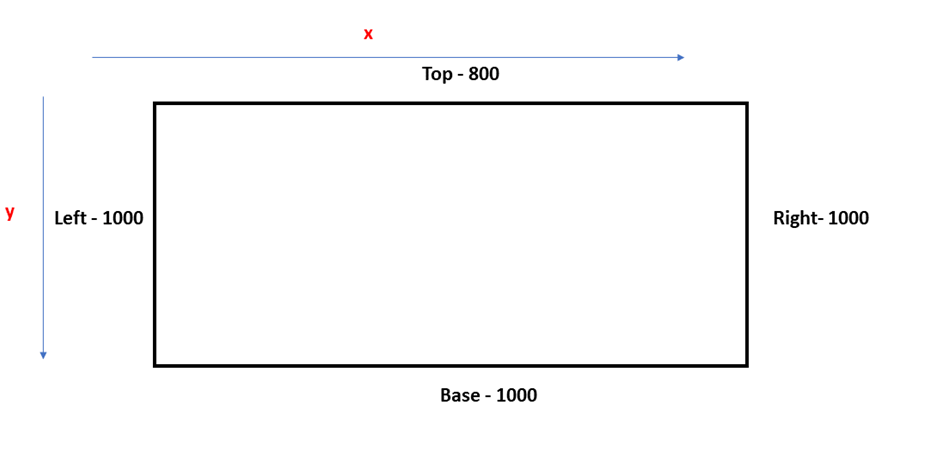

In [18]:
from IPython.display import Image
Image ("C:\\Users\\Mirzakhan\\Desktop\\img.png")

### Importing Prerequisite Libraries

In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
def calculate_PDE (N,M):
    
    col_names = ['x', 'y']
    DataFr = pd.DataFrame(columns = col_names)
    
    lenx = 360
    leny = 240
    
    dx = lenx/N
    dy = leny/M
    
    #Pup = 800
    #Pleft = 1000
    #Pright = 1000
    #Pbase = 1000
    
    vector = np.zeros(N*M)
    
    A = np.zeros((N*M,N*M))
    rows,cols = np.shape(A)
    
    count = 0
    
    for i in range(0,cols):
        for j in range(0,rows):
            if i == j:
                A[i][j] = -2*(1/dx**2 + 1/dy**2)

    for i in range(0,rows):
    
        for j in range(0, cols):
            if j - i == 1:
                A[i][j] = 1/(dx**2)
            if i - j == 1:
                A[i][j] = 1/(dx**2)
            if i==j and j + N < cols:
                A[i][j + N] = 1/(dy**2)
            if i==j and i + N <rows:
                A[i + N][j] = 1/(dy**2)


    c = 0 
    
    count = M - 1

    while count>0:
        A[c + N-1, c + N] = 0
        A[c + N, c + N-1] = 0

        c = c + N
        count = count - 1
    d = 0
    
    for j in range(1,M+1):
        for i in range(1, N+1):
            if (i-1==0 and j - 1==0):
                vector[d] = -(1000/dx**2 + 800/dy**2)
            if (i-1 != 0 and j-1==0 and i+1<=N):
                vector[d] = -800/dy**2
            if (j-1 != 0 and i-1==0 and j+1<=M):
                vector[d] = -1000/dx**2
            if ((i+1) > N and j-1 == 0):
                vector[d] = -(1000/dx**2 + 800/dy**2)
            if ((i-1)==0 and (j+1)>M ):
                vector[d] = -(1000/dx**2 + 1000/dy**2)

            if ((i+1)>N and (j+1)>M):
                vector[d] = -(1000/dx**2 + 1000/dy**2)

            if ((i+1)>N and j-1!=0 and j+1<=M):
                vector[d] = -1000/dx**2
            if ((i-1)!= 0 and (j+1)>M and (i+1)<=N):
                vector[d] = -1000/dy**2
            DataFr.loc[d, 'x'] = i
            DataFr.loc[d, 'y'] = j
            
            d = d + 1    
                      
    DataFr['Pressure'] = np.dot(np.linalg.inv(A), vector)  
    return DataFr


<IPython.core.display.Javascript object>


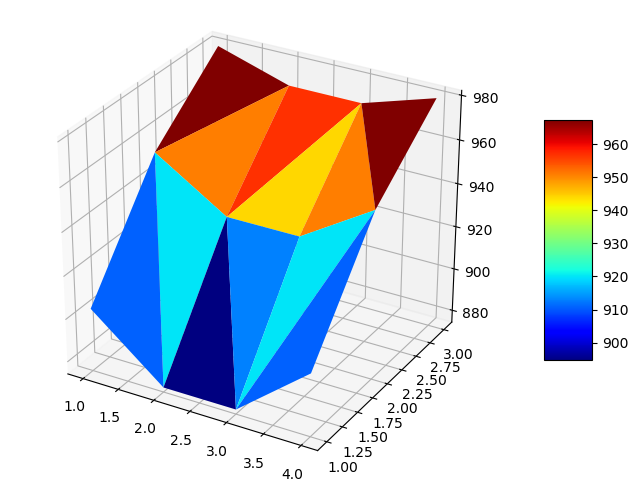

Elepsed time: 0.08394980430603027 sec


In [8]:
import time
start = time.time()
Distribution = calculate_PDE(4,3)
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(Distribution.x, Distribution.y, Distribution.Pressure, cmap = cm.jet, linewidth = 0.1 )
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()
end = time.time()

print("Elepsed time: {} sec".format(end-start))

<IPython.core.display.Javascript object>


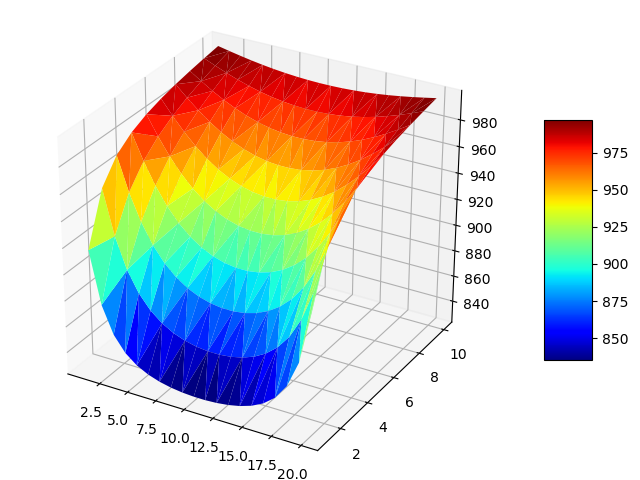

Elepsed time: 0.37365078926086426 sec


In [10]:
import time
start = time.time()
Distribution = calculate_PDE(20,10)
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(Distribution.x, Distribution.y, Distribution.Pressure, cmap = cm.jet, linewidth = 0.1 )
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()
end = time.time()

print("Elepsed time: {} sec".format(end-start))

<IPython.core.display.Javascript object>


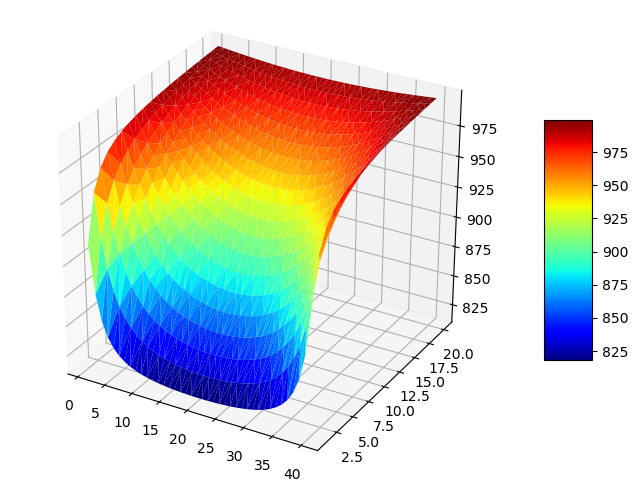

Elepsed time: 1.3906753063201904 sec


In [12]:
import time
start = time.time()
Distribution = calculate_PDE(40,20)
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(Distribution.x, Distribution.y, Distribution.Pressure, cmap = cm.jet, linewidth = 0.1 )
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()
end = time.time()

print("Elepsed time: {} sec".format(end-start))

<IPython.core.display.Javascript object>


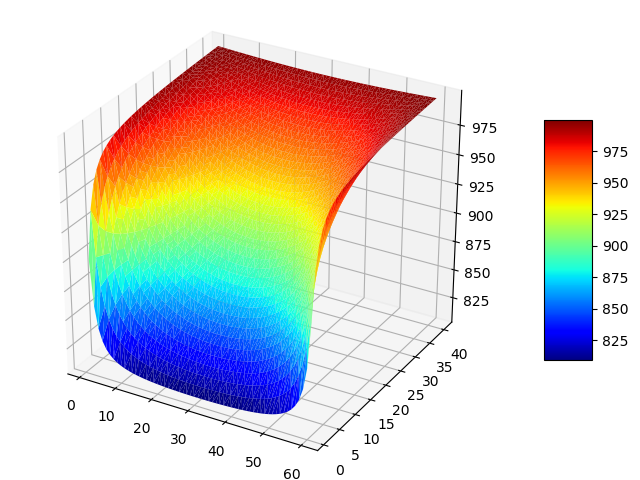

Elepsed time: 5.202872037887573 sec


In [13]:
import time
start = time.time()
Distribution = calculate_PDE(60,40)
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(Distribution.x, Distribution.y, Distribution.Pressure, cmap = cm.jet, linewidth = 0.1 )
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()
end = time.time()

print("Elepsed time: {} sec".format(end-start))